In [21]:
library(dplyr)
library(tidyr)
library(broom)
library(ggplot2)

In [4]:
Env= c("High_inoc","High_NO_inoc","Low_inoc", "Low_NO_inoc")
CV1= c(30,150,20,100)
CV2= c(74,99,49,73)
CV3= c(78,106,56,69)
CV4= c(86,92,66,70)
CV5= c(74,98,57,79)
Data= data.frame(Env,CV1,CV2,CV3,CV4,CV5)
Data

Env,CV1,CV2,CV3,CV4,CV5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High_inoc,30,74,78,86,74
High_NO_inoc,150,99,106,92,98
Low_inoc,20,49,56,66,57
Low_NO_inoc,100,73,69,70,79


In [5]:
Data$Mean= rowMeans (Data %>% select(-Env))
Data= rbind(Data, c("Mean", colMeans(Data %>% select(-Env))))
Data

Env,CV1,CV2,CV3,CV4,CV5,Mean
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
High_inoc,30,74,78,86,74,68.4
High_NO_inoc,150,99,106,92,98,109
Low_inoc,20,49,56,66,57,49.6
Low_NO_inoc,100,73,69,70,79,78.2
Mean,75,73.75,77.25,78.5,77,76.3


In [6]:
Data$Mean= as.numeric(Data$Mean)
Data$Env_index= Data$Mean - Data$Mean[nrow(Data)]
Data

Env,CV1,CV2,CV3,CV4,CV5,Mean,Env_index
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
High_inoc,30,74,78,86,74,68.4,-7.9
High_NO_inoc,150,99,106,92,98,109.0,32.7
Low_inoc,20,49,56,66,57,49.6,-26.7
Low_NO_inoc,100,73,69,70,79,78.2,1.9
Mean,75,73.75,77.25,78.5,77,76.3,0.0


In [7]:
Data= Data [-5,-7]  # delete 5th row and 7th column
Data

,Env,CV1,CV2,CV3,CV4,CV5,Env_index
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,High_inoc,30,74,78,86,74,-7.9
2,High_NO_inoc,150,99,106,92,98,32.7
3,Low_inoc,20,49,56,66,57,-26.7
4,Low_NO_inoc,100,73,69,70,79,1.9


In [13]:
df= data.frame(
               Data %>%
               pivot_longer(
               cols=c(CV1, CV2, CV3, CV4, CV5),
               names_to="Genotype", values_to="Yield")
               )
df

Env,Env_index,Genotype,Yield
<chr>,<dbl>,<chr>,<chr>
High_inoc,-7.9,CV1,30
High_inoc,-7.9,CV2,74
High_inoc,-7.9,CV3,78
High_inoc,-7.9,CV4,86
High_inoc,-7.9,CV5,74
High_NO_inoc,32.7,CV1,150
High_NO_inoc,32.7,CV2,99
High_NO_inoc,32.7,CV3,106
High_NO_inoc,32.7,CV4,92


In [15]:
summary(lm (Yield ~ Env_index, data=df %>% filter (Genotype=="CV1")))
summary(lm (Yield ~ Env_index, data=df %>% filter (Genotype=="CV2")))
summary(lm (Yield ~ Env_index, data=df %>% filter (Genotype=="CV3")))
summary(lm (Yield ~ Env_index, data=df %>% filter (Genotype=="CV4")))
summary(lm (Yield ~ Env_index, data=df %>% filter (Genotype=="CV5")))


Call:
lm(formula = Yield ~ Env_index, data = df %>% filter(Genotype == 
    "CV1"))

Residuals:
      1       2       3       4 
-26.517  -1.504   7.467  20.555 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  75.0000    12.1639   6.166   0.0253 *
Env_index     2.3396     0.5659   4.134   0.0538 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.33 on 2 degrees of freedom
Multiple R-squared:  0.8952,	Adjusted R-squared:  0.8429 
F-statistic: 17.09 on 1 and 2 DF,  p-value: 0.05382



Call:
lm(formula = Yield ~ Env_index, data = df %>% filter(Genotype == 
    "CV2"))

Residuals:
      1       2       3       4 
 6.5894 -0.9903 -3.3244 -2.2747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  73.7500     2.7529  26.790  0.00139 **
Env_index     0.8025     0.1281   6.266  0.02454 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.506 on 2 degrees of freedom
Multiple R-squared:  0.9515,	Adjusted R-squared:  0.9273 
F-statistic: 39.26 on 1 and 2 DF,  p-value: 0.02454



Call:
lm(formula = Yield ~ Env_index, data = df %>% filter(Genotype == 
    "CV3"))

Residuals:
     1      2      3      4 
 7.101  2.460  0.216 -9.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  77.2500     4.3607  17.715  0.00317 **
Env_index     0.8040     0.2029   3.963  0.05817 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.721 on 2 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8306 
F-statistic: 15.71 on 1 and 2 DF,  p-value: 0.05817



Call:
lm(formula = Yield ~ Env_index, data = df %>% filter(Genotype == 
    "CV4"))

Residuals:
     1      2      3      4 
10.491  1.119 -2.390 -9.219 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  78.5000     5.0253   15.62  0.00407 **
Env_index     0.3786     0.2338    1.62  0.24675   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.05 on 2 degrees of freedom
Multiple R-squared:  0.5674,	Adjusted R-squared:  0.3511 
F-statistic: 2.623 on 1 and 2 DF,  p-value: 0.2467



Call:
lm(formula = Yield ~ Env_index, data = df %>% filter(Genotype == 
    "CV5"))

Residuals:
      1       2       3       4 
 2.3353 -1.0843 -1.9679  0.7168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.00000    1.17345   65.62 0.000232 ***
Env_index    0.67536    0.05459   12.37 0.006471 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.347 on 2 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9807 
F-statistic:   153 on 1 and 2 DF,  p-value: 0.006471


In [17]:
regression= df%>% group_by(Genotype) %>% do(model= lm(Yield~Env_index, data=.))
regression$model

[[1]]

Call:
lm(formula = Yield ~ Env_index, data = .)

Coefficients:
(Intercept)    Env_index  
      75.00         2.34  


[[2]]

Call:
lm(formula = Yield ~ Env_index, data = .)

Coefficients:
(Intercept)    Env_index  
    73.7500       0.8025  


[[3]]

Call:
lm(formula = Yield ~ Env_index, data = .)

Coefficients:
(Intercept)    Env_index  
     77.250        0.804  


[[4]]

Call:
lm(formula = Yield ~ Env_index, data = .)

Coefficients:
(Intercept)    Env_index  
    78.5000       0.3786  


[[5]]

Call:
lm(formula = Yield ~ Env_index, data = .)

Coefficients:
(Intercept)    Env_index  
    77.0000       0.6754  



In [19]:
library(broom)
regression1= df %>% group_by(Genotype) %>% do(tidy(lm(Yield ~ Env_index, data=.)))
regression1

Genotype,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CV1,(Intercept),75.0000000,12.1638994,6.165786,0.025309723
CV1,Env_index,2.3395736,0.5658852,4.134361,0.053823885
CV2,(Intercept),73.7500000,2.7528814,26.790112,0.001390415
CV2,Env_index,0.8024564,0.1280687,6.265828,0.024537235
CV3,(Intercept),77.2500000,4.3607461,17.714859,0.003171427
CV3,Env_index,0.8039714,0.2028693,3.963002,0.058171978
CV4,(Intercept),78.5000000,5.0252942,15.620976,0.004073090
CV4,Env_index,0.3786387,0.2337852,1.619601,0.246746749
CV5,(Intercept),77.0000000,1.1734503,65.618456,0.000232165


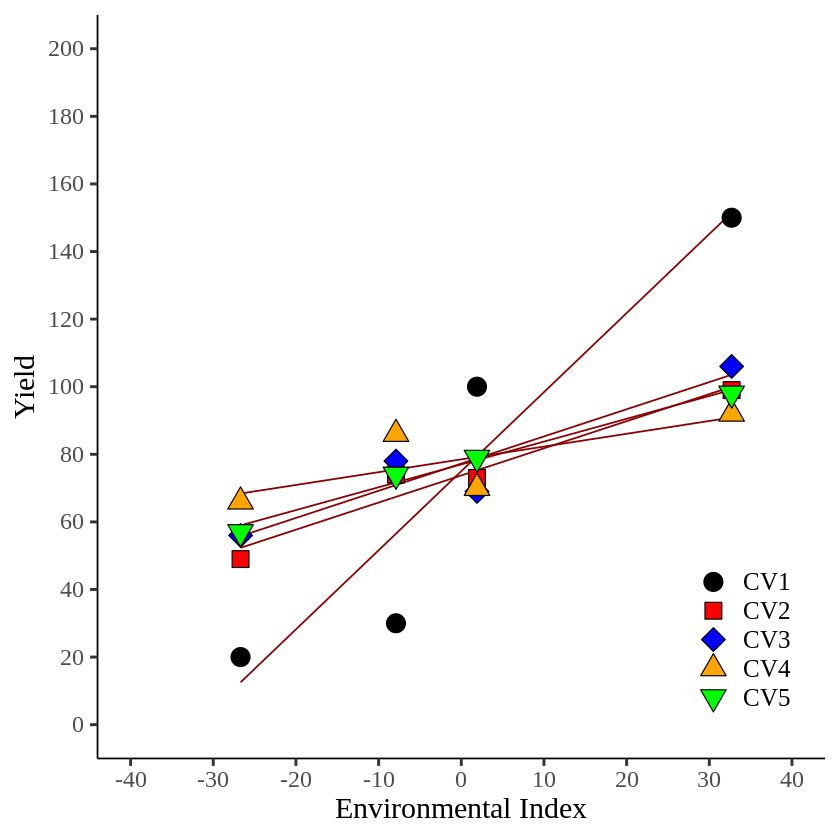

In [25]:
ggplot(data=df, aes(x=as.numeric(Env_index), y=as.numeric(Yield), group=Genotype)) +
  geom_smooth(method = lm, level=0.95, se=FALSE, linetype=1, color="Dark red", linewidth=0.5, formula= y ~ x) +
  geom_point (aes(shape=Genotype, fill=Genotype), col="Black", size=5, stroke = 0.5) +
  scale_shape_manual(values = c(21, 22, 23, 24, 25)) +
  scale_fill_manual(values = c("Black","Red",'Blue',"Orange","Green")) +
  scale_x_continuous(breaks = seq(-40,40,10), limits = c(-40,40)) +
  scale_y_continuous(breaks = seq(0,200,20), limits = c(0,200)) +
  labs(x="Environmental Index", y="Yield") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position=c(0.89,0.17),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"))